In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
PREDICTIONS_PATH = "/data/ltorres/predictions"

---

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
df_cloudnet = pd.read_csv(os.path.join(PREDICTIONS_PATH, "predictions_cloudnet.csv"))

In [6]:
cm_cloudnet = confusion_matrix(df_cloudnet['targets'], df_cloudnet['predictions'])

In [7]:
accuracy_score(df_cloudnet['targets'], df_cloudnet['predictions'])

0.7058888888888889

In [8]:
def normalized_matrix(conf_matrix):
    labels = ["cumulus", "altocumulus", "cirrus", "clearsky", "stratocumulus", "cumulonimbus", "mixed"]
    
    matrix = (conf_matrix/np.sum(conf_matrix, axis=1).reshape(-1,1))
    
    return pd.DataFrame(data=matrix, index=labels, columns=labels)

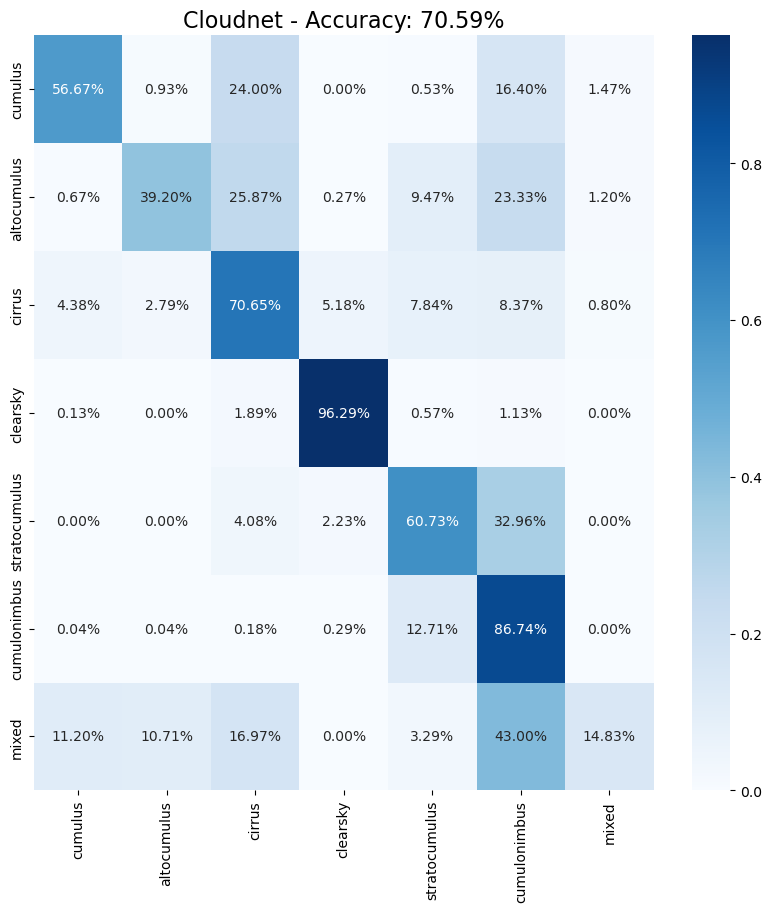

In [14]:
plt.figure(figsize=(10,10), dpi=100)
cloudnet_acc = accuracy_score(df_cloudnet['targets'], df_cloudnet['predictions'])
plt.title(f"Cloudnet - Accuracy: {cloudnet_acc:.2%}", fontsize=16)
sns.heatmap(normalized_matrix(cm_cloudnet), annot=True, fmt='.2%', cmap='Blues')
plt.show()